In [12]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [15]:
import sys
sys.path.append('/content/drive/MyDrive/NLP/CNN')

## Black and White

In [16]:
from convolve_images_11 import *

In [20]:
input_image = load_image('/content/drive/MyDrive/NLP/CNN/cheetah.jpg')

# kernel to be used to get sharpened image
KERNEL = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
image_sharpen = convolve2d(input_image, kernel=KERNEL)
cv2.imwrite('/content/drive/MyDrive/NLP/CNN/' + IMAGES_PATH + '/sharpened_cheetah.jpg', image_sharpen)

image matrix size:  (630, 1030)

 First 5 columns and rows of the image matrix: 
 [[101 101 101 101 101]
 [101 101 101 101 101]
 [101 101 101 101 101]
 [101 101 101 101 101]
 [101 101 101 101 101]]


True

In [21]:
image_sharpen

array([[ 47, 202, 202, ..., 194, 194,  35],
       [202, 101, 101, ...,  97,  97, 194],
       [202, 101, 101, ...,  97,  98, 194],
       ...,
       [  6, 218, 136, ..., 116,  99, 115],
       [118,  29,  70, ..., 124,  89,  90],
       [109, 229, 168, ..., 122,  72,  90]], dtype=uint8)

In [22]:
import matplotlib.pyplot as plt

In [27]:
def save_and_show(input_image, KERNEL):
    if input_image is None:
        print("Ошибка загрузки изображения!")
    else:
        # Kernel для повышения резкости
        if KERNEL is None:
          KERNEL = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
        image_sharpen = convolve2d(input_image, KERNEL)
        image_sharpen = np.clip(image_sharpen, 0, 255).astype(np.uint8)

        # Отображение изображений
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))

        axes[0].imshow(input_image, cmap='gray')
        axes[0].set_title('Original Image')
        axes[0].axis('off')

        axes[1].imshow(image_sharpen, cmap='gray')
        axes[1].set_title('Sharpened Image')
        axes[1].axis('off')

        plt.tight_layout()
        plt.show()

        # Сохранение
        cv2.imwrite('/content/drive/MyDrive/NLP/CNN/images_conv/sharpened_cheetah.jpg', image_sharpen)
        print("Изображение сохранено!")

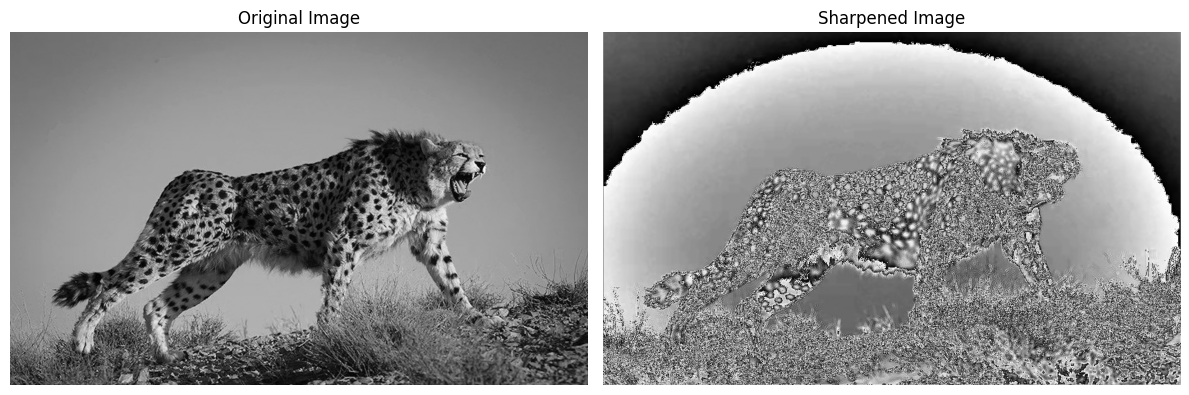

Изображение сохранено!


In [28]:
save_and_show(input_image, KERNEL = np.array([[-1, -1, -1], [-1, 4, -1], [-1, -1, -1]]))

In [29]:
import cv2

class BlacknWhite(object):
    """BlacknWhite Filter
        A class that applies BlacknWhite filter to an image.
        The class uses downsampling, bilateral filter and upsampling to create
        a BlacknWhite filter.
    """
    def __init__(self):
        pass
    def resize(self,image, window_height = 500):
        aspect_ratio = float(image.shape[1])/float(image.shape[0])
        window_width = window_height/aspect_ratio
        image = cv2.resize(image, (int(window_height),int(window_width)))
        return image

    def render(self, img_rgb):
        img_rgb = cv2.imread(img_rgb)
        img_rgb = self.resize(img_rgb,500)
        numDownSamples = 2       # number of downscaling steps
        numBilateralFilters = 50  # number of bilateral filtering steps
        # -- STEP 1 --
        # downsample image using Gaussian pyramid
        img_color = img_rgb
        for _ in range(numDownSamples):
            img_color = cv2.pyrDown(img_color)
        #cv2.imshow("downcolor",img_color)
        #cv2.waitKey(0)
        # repeatedly apply small bilateral filter instead of applying
        # one large filter
        for _ in range(numBilateralFilters):
            img_color = cv2.bilateralFilter(img_color, 9, 9, 7)
        #cv2.imshow("bilateral filter",img_color)
        #cv2.waitKey(0)
        # upsample image to original size
        for _ in range(numDownSamples):
            img_color = cv2.pyrUp(img_color)
        #cv2.imshow("upscaling",img_color)
        #cv2.waitKey(0)
        # -- STEPS 2 and 3 --
        # convert to grayscale and apply median blur
        img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
        return img_gray
    def start(self, img_path, image, new_image):
        tmp_canvas =BlacknWhite() #make a temporary object
        file_name = img_path #File_name will come here
        res = tmp_canvas.render(image)
        cv2.imwrite(f"{new_image}", res)
        # cv2.imshow(f"{image}", res)
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()
        # print(f"Image saved as {new_image}")
        return 0

In [32]:
from google.colab.patches import cv2_imshow

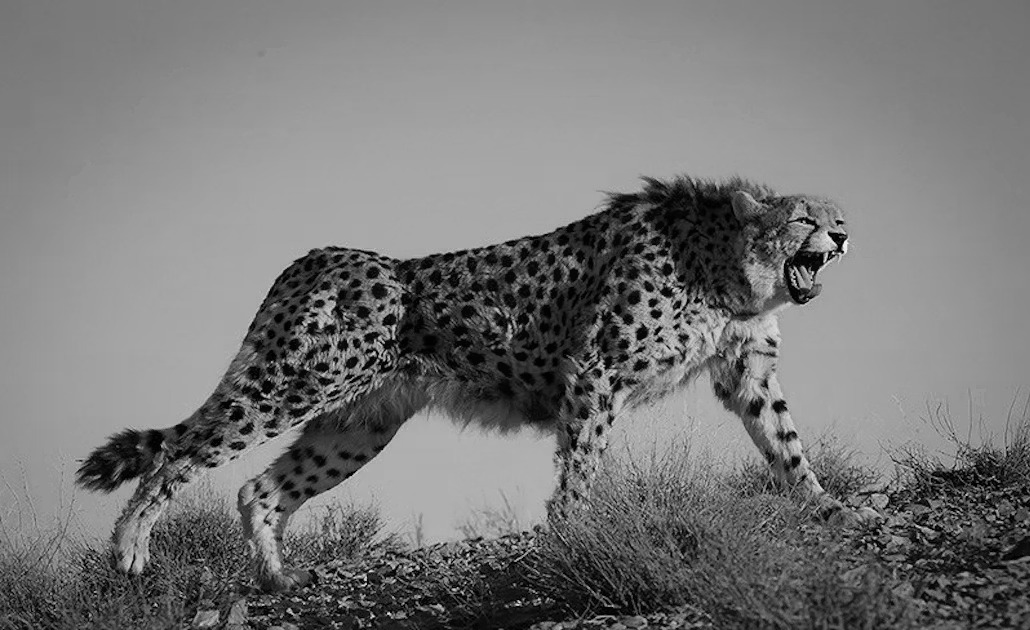

In [35]:
img_rgb = cv2.imread('/content/drive/MyDrive/NLP/CNN/cheetah.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
cv2_imshow(img_gray)

In [36]:
filter_img = BlacknWhite()

In [43]:
import os
img_path = '/content/drive/MyDrive/NLP/CNN/cheetah.jpg' #os.getcwd()

In [44]:
img_path

'/content/drive/MyDrive/NLP/CNN/cheetah.jpg'

In [54]:
filter_img.start(img_path = img_path, image = '/content/drive/MyDrive/NLP/CNN/cheetah.jpg' , new_image = '/content/drive/MyDrive/NLP/CNN/images_conv/cheetah_bw.jpg')

0

In [55]:
img_rgb[0][0].shape

(3,)

In [56]:
img_rgb = cv2.imread('/content/drive/MyDrive/NLP/CNN/cheetah.jpg')
#img_rgb[0].shape
#img_rgb = img_rgb.resize(img_rgb,500)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

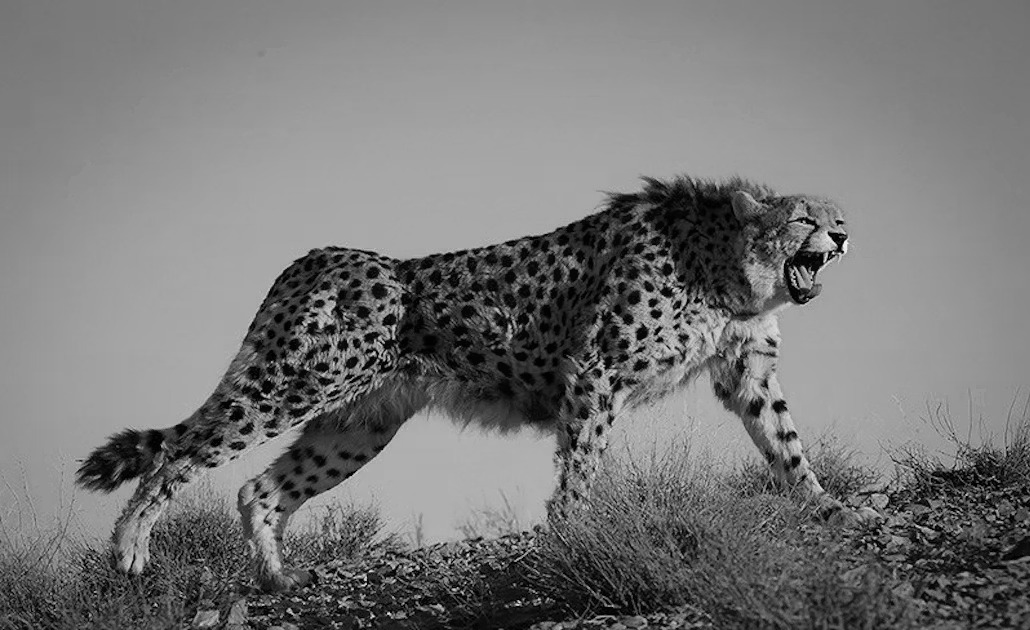

In [53]:
cv2_imshow(img_gray)

## SHARPENING

In [57]:
import cv2
import numpy as np

class sharpening:
    """sharpening filter ---
        This class will apply sharpening filter to an image
        by applying a defined kernel values to the image.
    """
    def __init__(self):
        pass

    def resize(self,image,window_height = 500):
        aspect_ratio = float(image.shape[1])/float(image.shape[0])
        window_width = window_height/aspect_ratio
        image = cv2.resize(image, (int(window_height),int(window_width)))
        return image

    def sharp(self,image):
        # Use a standard sharpening kernel
        kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
        # The commented out kernels or overwritten ones were either for edge detection or non-standard sharpening.

        # applying the sharpening kernel to the input image & displaying it.
        sharpened = cv2.filter2D(image, -1, kernel)
        # Noise reduction
        sharpened = cv2.bilateralFilter(sharpened, 9, 75, 75)
        return sharpened

    def start(self, img_path, new_image):
        # Create an image object
        image = cv2.imread(img_path)
        image = self.resize(image, 500)
        # No need to create a new instance if 'start' is called on an existing object
        res = self.sharp(image)
        cv2.imwrite(new_image, res)
        # cv2.imshow('original',image) # cv2.imshow is usually problematic in Colab
        # cv2.imshow('sharp',res)

        print(f'Image saved as {new_image}')
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()

In [58]:
filter_sharp = sharpening()

In [60]:
filter_sharp.start(img_path = '/content/drive/MyDrive/NLP/CNN/cheetah.jpg', new_image = '/content/drive/MyDrive/NLP/CNN/images_conv/cheetah_sharp.jpg')

Image saved as /content/drive/MyDrive/NLP/CNN/images_conv/cheetah_sharp.jpg


## CARTOONIZER

In [61]:

class Cartoonizer(object):
    """Cartoonizer effect
        A class that applies a cartoon effect to an image.
        The class uses a bilateral filter and adaptive thresholding to create
        a cartoon effect.
    """
    def __init__(self):
        pass

    def resize(self,image,window_height = 500):
        aspect_ratio = float(image.shape[1])/float(image.shape[0])
        window_width = window_height/aspect_ratio
        image = cv2.resize(image, (int(window_height),int(window_width)))
        return image
    def render(self, img_rgb):
        img_rgb = cv2.imread(img_rgb)
        img_rgb = self.resize(img_rgb, 500)
        numDownSamples = 2       # number of downscaling steps
        numBilateralFilters = 50  # number of bilateral filtering steps
        # -- STEP 1 --
        # downsample image using Gaussian pyramid
        img_color = img_rgb
        for _ in range(numDownSamples):
            img_color = cv2.pyrDown(img_color)
        #cv2.imshow("downcolor",img_color)
        #cv2.waitKey(0)
        # repeatedly apply small bilateral filter instead of applying
        # one large filter
        for _ in range(numBilateralFilters):
            img_color = cv2.bilateralFilter(img_color, 9, 9, 7)
        #cv2.imshow("bilateral filter",img_color)
        #cv2.waitKey(0)
        # upsample image to original size
        for _ in range(numDownSamples):
            img_color = cv2.pyrUp(img_color)
        #cv2.imshow("upscaling",img_color)
        #cv2.waitKey(0)
        # -- STEPS 2 and 3 --
        # convert to grayscale and apply median blur
        img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
        img_blur = cv2.medianBlur(img_gray, 3)
        #cv2.imshow("grayscale+median blur",img_color)
        #cv2.waitKey(0)
        # -- STEP 4 --
        # detect and enhance edges
        img_edge = cv2.adaptiveThreshold(img_blur, 255,
                                         cv2.ADAPTIVE_THRESH_MEAN_C,
                                         cv2.THRESH_BINARY,9, 2)
        #cv2.imshow("edge",img_edge)
        #cv2.waitKey(0)
        # -- STEP 5 --
        # convert back to color so that it can be bit-ANDed with color image
        (x,y,z) = img_color.shape
        img_edge = cv2.resize(img_edge,(y,x))
        img_edge = cv2.cvtColor(img_edge, cv2.COLOR_GRAY2RGB)
        #cv2.imwrite("edge.png",img_edge)
        #cv2.imshow("step 5", img_edge)
        #cv2.waitKey(0)
        #img_edge = cv2.resize(img_edge,(i for i in img_color.shape[:2]))
        #print img_edge.shape, img_color.shape
        return cv2.bitwise_and(img_color, img_edge)
    def start(self, img_path, image, new_image):
        # make a temporary object
        # tmp_canvas = Cartoonizer() # Removed redundant instance creation
        # file_name = img_path # Removed unused variable
        res = self.render(image)
        cv2.imwrite(new_image, res)
        # cv2.imshow("Cartoon version", res)
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()
        print(f"Image saved as '{new_image}'")

In [62]:
cartoon_filter = Cartoonizer()

In [63]:
cartoon_filter.start(img_path = img_path, image = '/content/drive/MyDrive/NLP/CNN/cheetah.jpg', new_image = '/content/drive/MyDrive/NLP/CNN/images_conv/cheetah_cartoon.jpg' )

Image saved as '/content/drive/MyDrive/NLP/CNN/images_conv/cheetah_cartoon.jpg'


## Negative filtering

In [64]:


# find max GSV
def findMax(k):
    mx = 0
    for i in k:
        if i>mx:
            mx = i
    return mx

class Negative(object):

    def __init__(self):
        pass
    def resize(self,image,window_height = 500):
        aspect_ratio = float(image.shape[1])/float(image.shape[0])
        window_width = window_height/aspect_ratio
        image = cv2.resize(image, (int(window_height),int(window_width)))
        return image

    def render(self, img_rgb):
        img_gray = cv2.imread(img_rgb, 0)
        img_gray = self.resize(img_gray, 500)
        #get all image values
        k = []
        for i in range(img_gray.shape[0]):
            for j in range(img_gray.shape[1]):
                k.append(img_gray[i,j])
        L = findMax(k) #max GSV
        dst = img_gray.copy() # Use .copy() for a deep copy
        #update dst
        for i in range(img_gray.shape[0]):
          for j in range(img_gray.shape[1]):
            dst[i,j] = L - dst[i,j]
        return dst
    def start(self, img_path, image, new_image):
        # Removed redundant tmp_canvas creation and unused file_name
        res = self.render(image)
        cv2.imwrite(new_image, res)
        # cv2.imshow("Negative Version", res) # cv2.imshow is usually problematic in Colab
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()
        print(f"Image saved as {new_image}") # Fixed f-string formatting

In [65]:
negative_filter = Negative()

In [66]:
negative_filter.start(img_path, image = '/content/drive/MyDrive/NLP/CNN/cheetah.jpg', new_image = '/content/drive/MyDrive/NLP/CNN/images_conv/cheetah_negative.jpg' )

Image saved as /content/drive/MyDrive/NLP/CNN/images_conv/cheetah_negative.jpg


## OLD FILTER

In [67]:
import numpy as np
import argparse
import random
import os, sys
import cv2

class old_filter(object):
    """old_filter effect
        A class that applies a random old filter effect to an image
        using a set of pre-designed filters and applying Arithmetic
        Operations on Image to add the filter effect on it.
    """

    def __init__(self):
        pass

    #function to resize
    #according to the aspect ratio of the image
    def resize(self,image,window_height = 500):
        aspect_ratio = float(image.shape[1])/float(image.shape[0])
        window_width = window_height/aspect_ratio
        image = cv2.resize(image, (int(window_height),int(window_width)))
        return image
    #function that renders the image
    def render(self, img_path_original):
        img = cv2.imread(img_path_original, 0)
        img = self.resize(img, 500)

        filtern = []
        filters = list(range(1,7))
        for l in filters:
            filtern.append(str(l) +'n')
        filters.extend(filtern)

        selectedfilter = str(random.choice(filters))

        # Construct the path to the actual filter image
        # Assuming 'oldfilters' directory is next to 'convolve_images_11.py'
        # in '/content/drive/MyDrive/NLP/CNN'
        base_filter_dir = '/content/drive/MyDrive/NLP/CNN/oldfilters/'
        filter_file_name = 'old' + selectedfilter + '.jpg'
        filter_path = os.path.join(base_filter_dir, filter_file_name)

        # Check if the filter file exists
        if not os.path.exists(filter_path):
            print(f"Warning: Filter image not found at {filter_path}. Returning original grayscale image.")
            return img # Return original grayscale or handle appropriately

        old_filter_image = cv2.imread(filter_path, 0)
        if old_filter_image is None:
            print(f"Warning: Could not load filter image from {filter_path}. Returning original grayscale image.")
            return img # Fallback if image load fails

        old_filter_image = cv2.resize(old_filter_image, (img.shape[1], img.shape[0]))

        if selectedfilter.endswith('n'):
            #selected file is an normal filter and Arithmetic addition
            #needs to be applied on it

            #cv2.imshow('filter',old_filter_image)
            #cv2.imshow('image',img)

            #Arithmetic add
            add = cv2.add(img, old_filter_image)
            return add

        else:
            #selected file is an inverted filter and Weighted addition
            #needs to be applied on it

            #cv2.imshow('filter',old_filter_image)
            #cv2.imshow('image',img)

            #Weightedadd
            add = cv2.addWeighted(img, 0.7, old_filter_image, 0.3, 0)
            return add

    def start(self, image_path, new_image):
        # Use self.render instead of creating a new object
        res = self.render(image_path)
        cv2.imwrite(new_image, res)
        # cv2.imshow("old version", res) # cv2.imshow is usually problematic in Colab
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()
        print(f"Image saved as {new_image}")

In [68]:
old_filters = old_filter()

In [71]:
old_filters.start(image_path = '/content/drive/MyDrive/NLP/CNN/cheetah.jpg',  new_image = '/content/drive/MyDrive/NLP/CNN/images_conv/cheetah_old.jpg' )

Image saved as /content/drive/MyDrive/NLP/CNN/images_conv/cheetah_old.jpg
